In [2]:
import pandas as pd
import seaborn as sb
# Import dataset

data_file = "./Data/CIS_bdpm.txt"
drugs_names = ["CIS",
         "denomination",
         "galenic_form",
         "route_of_administration",
         "clearance_status",
         "clearance_type",
         "commercialisation_status",
         "clearance_date",
         "bdm_status", 
         "clearance_id",
         "owners",
         "enhanced_monitoring"]

drugs = pd.read_table(data_file, names=drugs_names, encoding="latin-1")
drugs=drugs.set_index("CIS")
drugs.head(n=10)

forms_names = ["CIS",
              "CIP7",
              "label",
              "administrative_status",
              "commercialisation_status",
               "commercialisation_date",
              "CIP13",
              "collectivities_aggreement",
              "reinbursement_rate",
              "price",
               "total_price",
               "dispensing_fee", # Je suppose...
              "description"]

forms = pd.read_table("./Data/CIS_CIP_bdpm.txt", names=forms_names, encoding="latin-1", sep="\t", index_col=False)
# forms.head(n=20)
forms=forms.set_index("CIP7")
forms.head(n=1)

#TODO : Un médicament n'ayant pas de taux de remboursement (non-remboursé) ne devrait pas avoir d'honoraire de dispensation ?

# Jointure sur les médicaments et leurs présentations
forms_drugs = forms.join(drugs, on="CIS", lsuffix="_left", rsuffix="_right")
all_cols = ['CIS', 'label', 'administrative_status', 
            'commercialisation_status_left', 'commercialisation_date', 'CIP13',
            'collectivities_aggreement', 'reinbursement_rate', 'price', 'total_price',
            'dispensing_fee', 'description', 'denomination', 'galenic_form',
            'route_of_administration', 'clearance_status', 'clearance_type',
            'commercialisation_status_right', 'clearance_date', 'bdm_status', 'clearance_id',
            'owners', 'enhanced_monitoring']
reordered_cols = ['denomination', 'label', 'galenic_form', 'price', 
                  'reinbursement_rate', 'commercialisation_date', 'clearance_date', 'owners', 
                  'commercialisation_status_left', 'collectivities_aggreement', 'total_price',
                  'administrative_status', 'dispensing_fee', 'description', 'route_of_administration',
                  'clearance_status', 'clearance_type', 'commercialisation_status_right',
                  'bdm_status', 'clearance_id', 'enhanced_monitoring', 'CIS', 'CIP13',]
forms_drugs = forms_drugs[reordered_cols]
forms_drugs.head(n=5)

####### Clean all prices cause they have weird format (eg: 47,522,55, I assumed it means 47 522.55)
def clean_price(price):
    if type(price) == str:
        comma_pos = price.rfind(",")
        if comma_pos != -1:
            price = price[:comma_pos] + "." + price[comma_pos+1:]
    return price
# Filter rows where there is no price
forms_drugs = forms_drugs[pd.notnull(forms_drugs['price'])]
forms_drugs['price'] = forms_drugs['price'].apply(clean_price)
forms_drugs['price'] = forms_drugs['price'].str.replace(",", "").astype(float)
# with pd.option_context("display.max_rows", 30000):
#     display(forms_drugs['price'])

with pd.option_context("display.max_rows", 30000):
    display(forms_drugs['price'])


CIP7
4949729       43.69
4949770      119.36
3320863        7.77
3696350       37.43
3614582        1.54
3972519       11.56
3551025        8.50
4944413        5.34
4944494       16.76
3236370        1.69
3236387        2.66
3978723       20.28
3602900        7.11
3809334        7.09
3378331        3.27
3740594        4.47
2211899        4.57
3657120        6.50
3651330       26.14
2794381        4.17
2794412       12.13
3202980        2.46
3487474       10.27
3496817        4.35
3738338       12.10
2165828       13.40
3589884       13.09
4921731       39.13
3682098        1.58
3701625        5.69
3875331       11.12
3826491       30.22
3004343       21.32
4901154        7.78
2169401        4.17
2210871       83.55
3102586       10.13
3841579        4.75
3973097      879.78
4921553        1.99
3101173       33.13
2196792       12.59
3636684        2.98
3779544        3.21
4936394        8.91
3798286       15.69
3092675        5.03
2660634       21.42
4162610       17.52
2744986      15

In [3]:
forms_drugs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12996 entries, 4949729 to 3376562
Data columns (total 23 columns):
denomination                      12996 non-null object
label                             12996 non-null object
galenic_form                      12996 non-null object
price                             12996 non-null float64
reinbursement_rate                12996 non-null object
commercialisation_date            12996 non-null object
clearance_date                    12996 non-null object
owners                            12996 non-null object
commercialisation_status_left     12996 non-null object
collectivities_aggreement         12996 non-null object
total_price                       12996 non-null object
administrative_status             12996 non-null object
dispensing_fee                    12996 non-null object
description                       854 non-null object
route_of_administration           12996 non-null object
clearance_status                  12996 non-

In [4]:
partfd = forms_drugs[:1000]

/home/alsyia/Projets/dac/IS3024-data-mining/venv/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


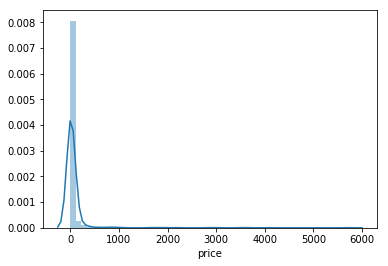

In [5]:
# Display prices distribution
sb.distplot(partfd["price"])

/home/alsyia/Projets/dac/IS3024-data-mining/venv/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


TypeError: can't multiply sequence by non-int of type 'float'

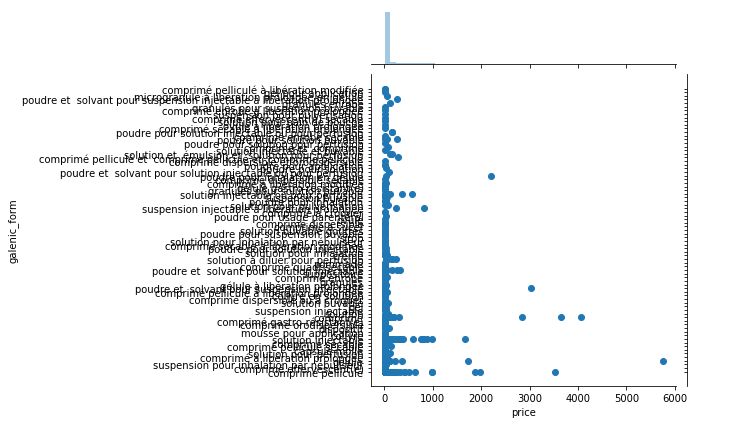

In [11]:
sb.jointplot(x="price", y="galenic_form", data=partfd);

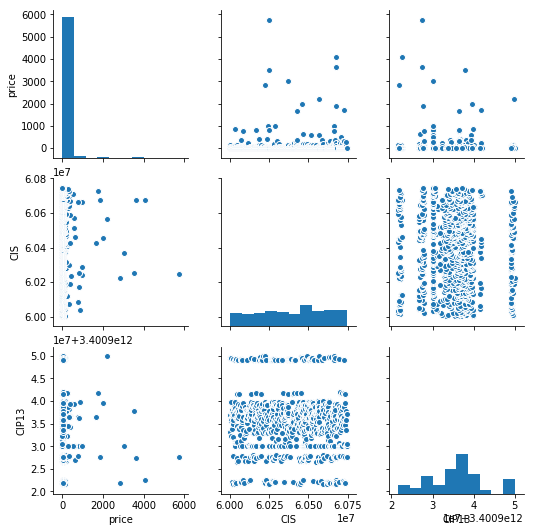

In [9]:
sb.pairplot(partfd)